In [172]:
# 📊 Credit Risk Model EDA

from preprocessing.load_data import load_data
from preprocessing.summary_stats import get_dataframe_overview
from preprocessing.outlier_handling import log_transform, cap_outliers, create_outlier_flag
from preprocessing.missing_values import report_missing
from preprocessing.distribution_plots import (
    plot_numerical_distributions,
    plot_categorical_distributions
)
from preprocessing. correlation import plot_correlation_heatmap
from preprocessing.outliers import plot_boxplots

In [173]:
# 🔗 Load data
df = load_data("../../data/raw/data.csv")

✅ Loaded data with shape: (95662, 16)


In [174]:
df.sample(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
76052,TransactionId_7153,BatchId_30565,AccountId_4512,SubscriptionId_2014,CustomerId_4973,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2019-01-28T10:41:13Z,2,0
43652,TransactionId_86147,BatchId_110870,AccountId_430,SubscriptionId_4639,CustomerId_759,UGX,256,ProviderId_6,ProductId_13,utility_bill,ChannelId_3,10000.0,11200,2018-12-28T08:43:25Z,2,0
8377,TransactionId_103167,BatchId_69811,AccountId_274,SubscriptionId_1435,CustomerId_600,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,600.0,600,2018-11-25T17:48:09Z,2,0
46800,TransactionId_71010,BatchId_21698,AccountId_307,SubscriptionId_1560,CustomerId_636,UGX,256,ProviderId_1,ProductId_10,airtime,ChannelId_3,500.0,500,2018-12-30T11:17:31Z,4,0
54879,TransactionId_21364,BatchId_59329,AccountId_1301,SubscriptionId_586,CustomerId_1663,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-01-08T19:32:52Z,2,0
12430,TransactionId_3563,BatchId_56828,AccountId_4841,SubscriptionId_3829,CustomerId_1477,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2018-11-30T20:51:27Z,2,0
8723,TransactionId_32968,BatchId_135145,AccountId_3707,SubscriptionId_2203,CustomerId_4149,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2018-11-26T11:55:36Z,2,0
31592,TransactionId_52842,BatchId_15263,AccountId_4840,SubscriptionId_3829,CustomerId_963,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2018-12-18T11:17:56Z,2,0
61081,TransactionId_25621,BatchId_49201,AccountId_4841,SubscriptionId_3829,CustomerId_3235,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-18.0,18,2019-01-15T15:36:55Z,2,0
45138,TransactionId_56660,BatchId_20326,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,7000.0,7000,2018-12-28T17:15:04Z,2,0


In [175]:
# 🧠 Basic summary
# from preprocessing.summary_stats import get_dataframe_overview

summary = get_dataframe_overview(df)

# Print or render as needed
# print("📐 Shape:", summary["shape"])
df.dtypes


TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [177]:
print("👀 Head:")
summary["head"]

👀 Head:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0


In [178]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [179]:
print("📊 Describe:")
summary["describe"]

📊 Describe:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


In [180]:
#keep a copy
df_clean=df.copy()

### Unique Columns

In [181]:
unique_columns=[] 
for col in df.columns.to_list():
    if df[col].is_unique:
        unique_columns.append(col)
        print(f'{col} : is a unique column')

TransactionId : is a unique column


In [182]:
def drop_column(df,columns):
    print(f'before: {len(df_clean.columns)}')
    for col in columns:
        if col in df.columns:
            df.drop(columns=[col],inplace=True)
            print(f'{col} dropped')
    print(f'after: {len(df.columns)}')
    return df
    

In [183]:
# for col in unique_columns:
df_clean=drop_column(df_clean,unique_columns)

before: 16
TransactionId dropped
after: 15


### Constant Columns

In [184]:
constant_columns=[]
for col in df.columns.to_list():
    if(df[col].nunique()==1):
        print( f'{col}: {df[col].nunique()}')
        constant_columns.append(col)

CurrencyCode: 1
CountryCode: 1


In [185]:
constant_columns

['CurrencyCode', 'CountryCode']

In [186]:
# for col in constant_columns:
df_clean=drop_column(df_clean,constant_columns)

before: 15
CurrencyCode dropped


CountryCode dropped
after: 13


In [187]:
for col in df.columns.to_list():
    print( f'{col}:       {df[col].nunique()}')

TransactionId:       95662
BatchId:       94809
AccountId:       3633
SubscriptionId:       3627
CustomerId:       3742
CurrencyCode:       1
CountryCode:       1
ProviderId:       6
ProductId:       23
ProductCategory:       9
ChannelId:       4
Amount:       1676
Value:       1517
TransactionStartTime:       94556
PricingStrategy:       4
FraudResult:       2


In [188]:
for col in df.columns.to_list():
    if df[col].nunique()<=25:
        print( f'{col}:       {df[col].unique()}')

CurrencyCode:       ['UGX']
CountryCode:       [256]
ProviderId:       ['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2']
ProductId:       ['ProductId_10' 'ProductId_6' 'ProductId_1' 'ProductId_21' 'ProductId_3'
 'ProductId_15' 'ProductId_11' 'ProductId_19' 'ProductId_4' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23']
ProductCategory:       ['airtime' 'financial_services' 'utility_bill' 'data_bundles' 'tv'
 'transport' 'ticket' 'movies' 'other']
ChannelId:       ['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']
PricingStrategy:       [2 4 1 0]
FraudResult:       [0 1]


In [189]:
df['BatchId'].nunique(), df['TransactionId'].nunique()

(94809, 95662)

In [190]:
df[['BatchId','TransactionId']]

,BatchId,TransactionId
0,BatchId_36123,TransactionId_76871
1,BatchId_15642,TransactionId_73770
2,BatchId_53941,TransactionId_26203
3,BatchId_102363,TransactionId_380
4,BatchId_38780,TransactionId_28195
...,...,...
95657,BatchId_96668,TransactionId_89881
95658,BatchId_3503,TransactionId_91597
95659,BatchId_118602,TransactionId_82501
95660,BatchId_70924,TransactionId_136354


In [191]:
#drop batchid because of its high cardinality
df_clean=drop_column(df_clean,columns=['BatchId'])

before: 13
BatchId dropped
after: 12


In [192]:
df_clean.columns

Index(['AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [193]:
# 🔍 Missing values
report_missing(df)

✅ No missing values found.


In [194]:
from preprocessing.time_features import extract_time_features

df_clean = extract_time_features(df_clean, "TransactionStartTime")
df_clean[["TransactionStartTime", "transaction_hour", "transaction_day", "transaction_month", "transaction_weekday"]].head()


,TransactionStartTime,transaction_hour,transaction_day,transaction_month,transaction_weekday
0,2018-11-15 02:18:49+00:00,2,15,11,3
1,2018-11-15 02:19:08+00:00,2,15,11,3
2,2018-11-15 02:44:21+00:00,2,15,11,3
3,2018-11-15 03:32:55+00:00,3,15,11,3
4,2018-11-15 03:34:21+00:00,3,15,11,3


In [ ]:
#AccountId and SubscriptionId are redundant
df[['AccountId','SubscriptionId','CustomerId']].sort_values(by='AccountId')

,AccountId,SubscriptionId,CustomerId
55475,AccountId_1,SubscriptionId_3960,CustomerId_46
55474,AccountId_1,SubscriptionId_3960,CustomerId_46
55363,AccountId_1,SubscriptionId_3960,CustomerId_46
19203,AccountId_10,SubscriptionId_4346,CustomerId_2665
54845,AccountId_10,SubscriptionId_4346,CustomerId_5231
...,...,...,...
36667,AccountId_998,SubscriptionId_247,CustomerId_1349
36669,AccountId_998,SubscriptionId_247,CustomerId_1349
36666,AccountId_998,SubscriptionId_247,CustomerId_1349
36675,AccountId_998,SubscriptionId_247,CustomerId_1349


In [196]:
df_clean=drop_column(df_clean,columns=['SubscriptionId'])

before: 16
SubscriptionId dropped
after: 15


In [197]:
df_clean.sample(5)

,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_weekday
9943,AccountId_4841,CustomerId_4636,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-10.0,10,2018-11-28 12:59:00+00:00,2,0,12,28,11,2
4916,AccountId_4841,CustomerId_665,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-16.2,17,2018-11-21 08:33:21+00:00,2,0,8,21,11,2
11903,AccountId_1608,CustomerId_1987,ProviderId_6,ProductId_8,tv,ChannelId_3,28000.0,28000,2018-11-30 15:48:59+00:00,2,0,15,30,11,4
33020,AccountId_4841,CustomerId_4785,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-100.0,100,2018-12-19 17:06:56+00:00,2,0,17,19,12,2
7131,AccountId_1761,CustomerId_2150,ProviderId_1,ProductId_3,airtime,ChannelId_3,500.0,500,2018-11-24 05:15:36+00:00,4,0,5,24,11,5


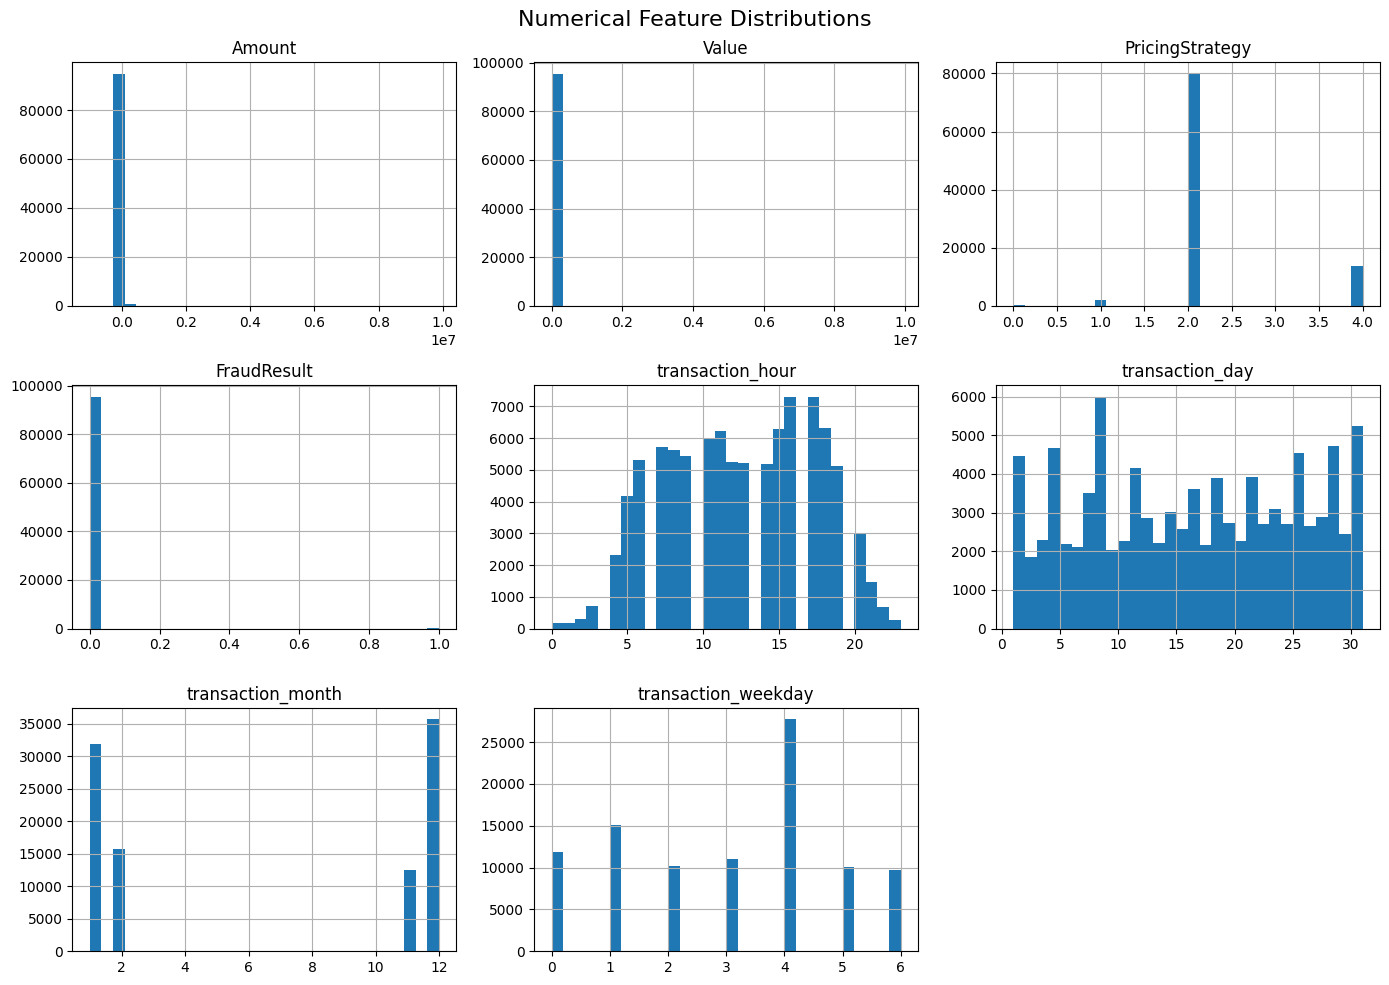

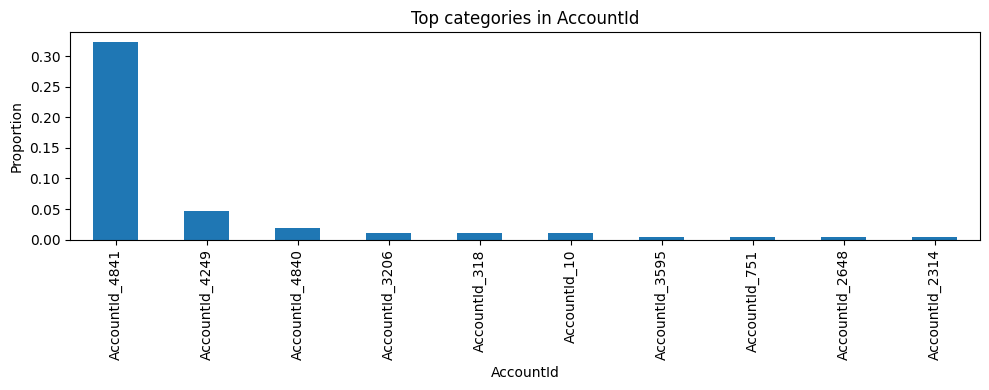

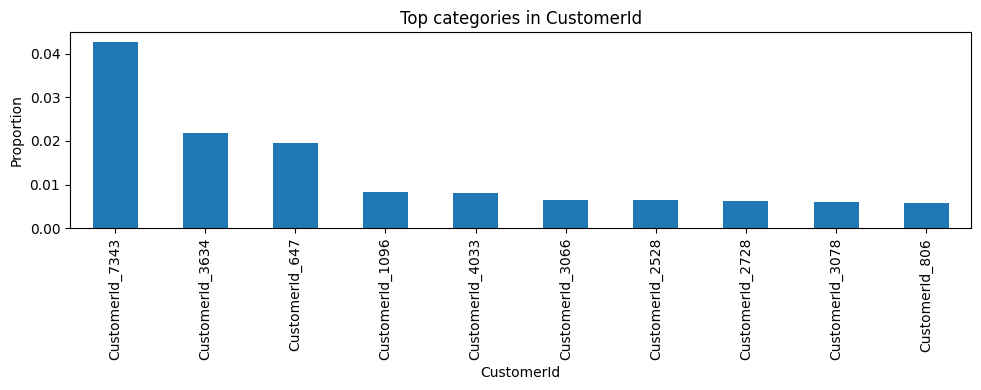

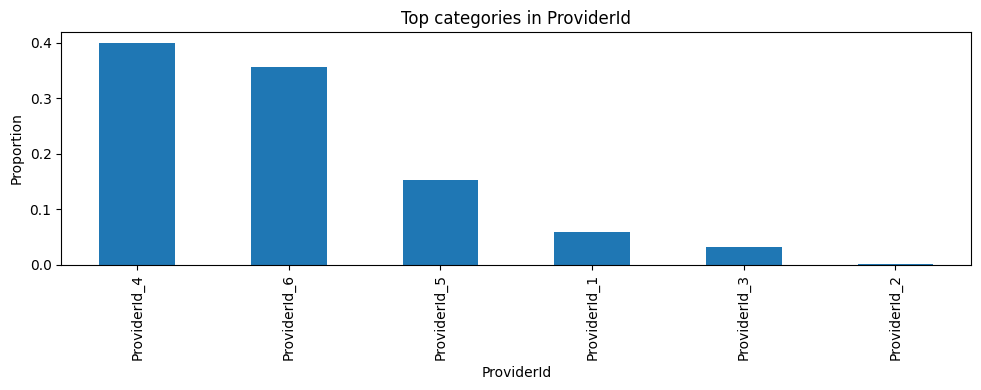

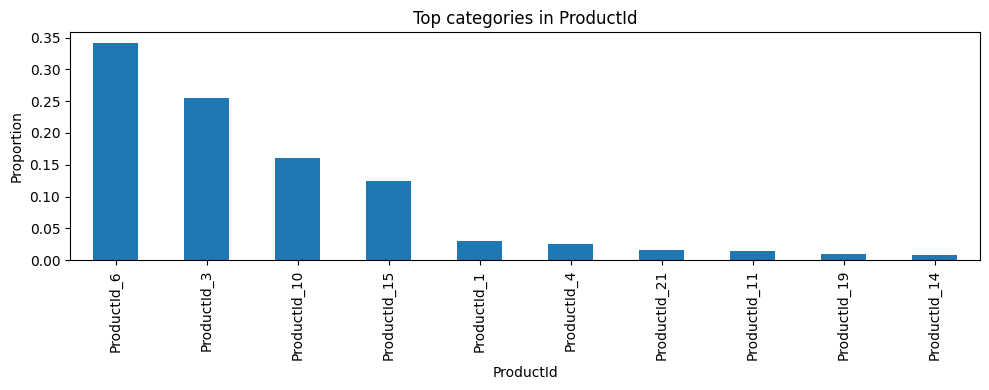

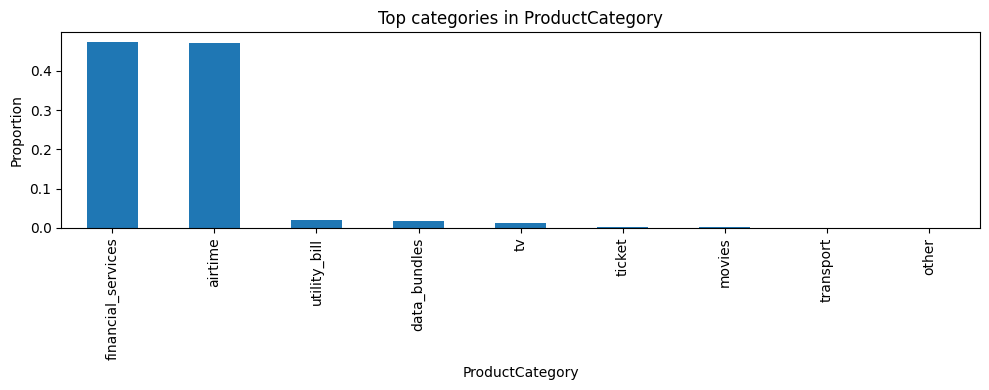

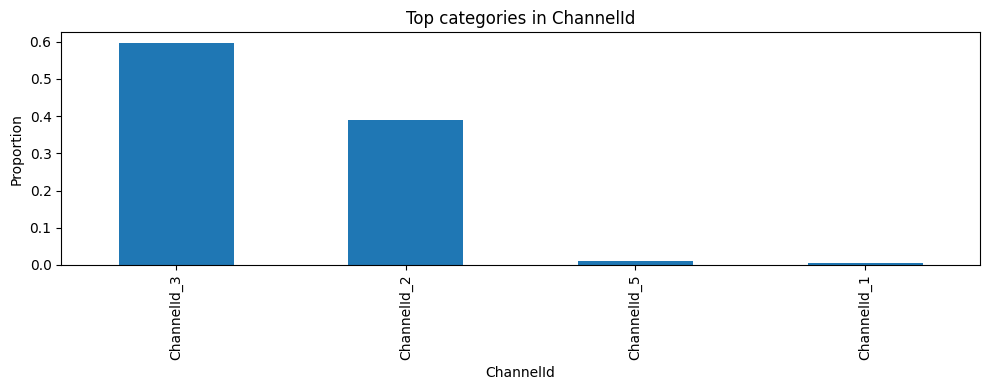

In [198]:
# 📊 Distributions
plot_numerical_distributions(df_clean)
plot_categorical_distributions(df_clean)

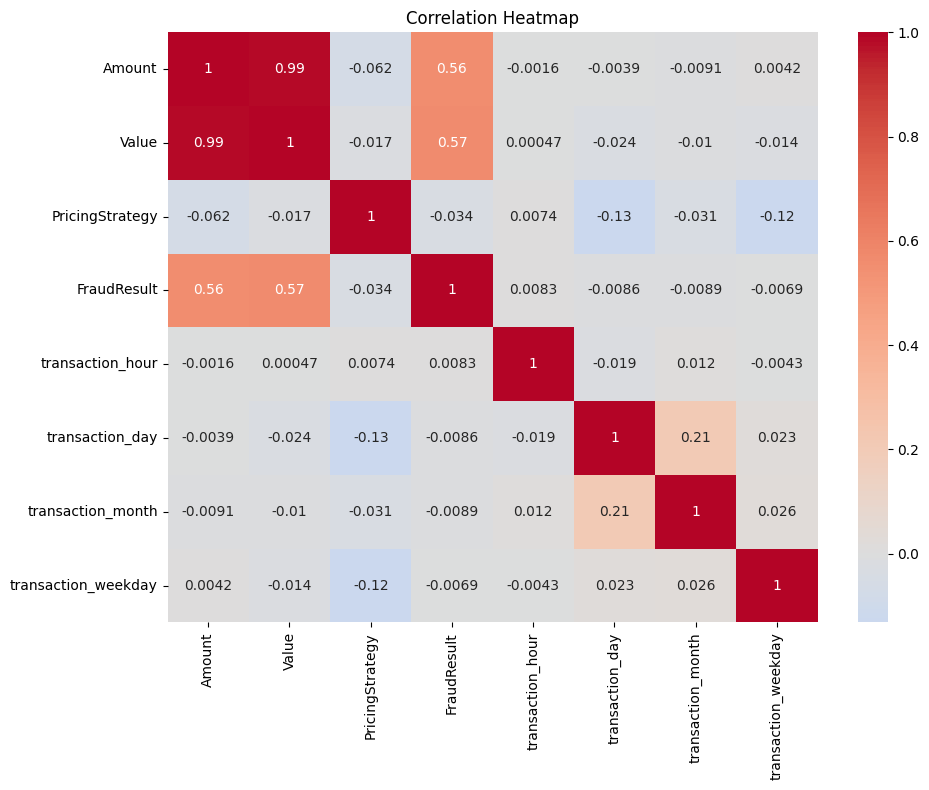

In [199]:
# 🔗 Correlation
plot_correlation_heatmap(df_clean)

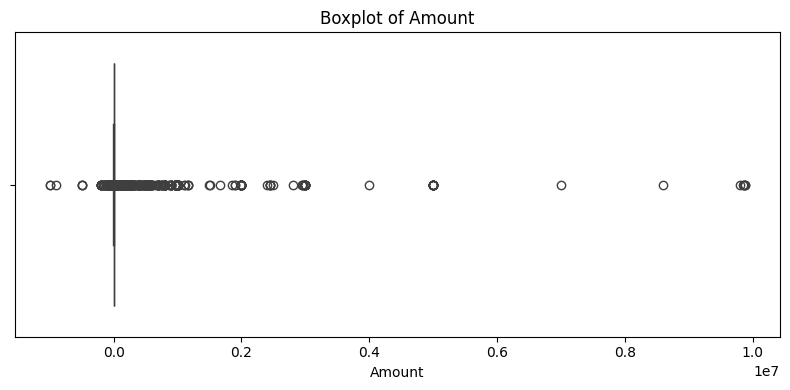

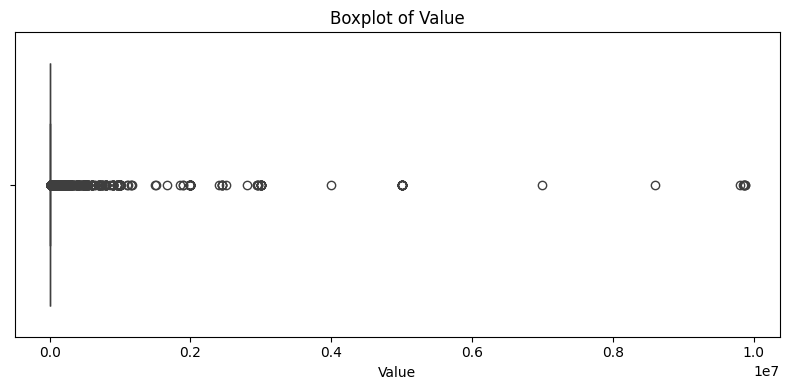

In [200]:
# 📦 Outliers
plot_boxplots(df, columns=['Amount', 'Value'])

In [201]:
#use flags to deal with outliers
df_clean["is_large_transaction"] = df_clean["Amount"] > df_clean["Amount"].quantile(0.95)

In [202]:
df_clean.sample(5)

,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_weekday,is_large_transaction
75658,AccountId_2648,CustomerId_3066,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-01-28 06:15:29+00:00,2,0,6,28,1,0,False
17938,AccountId_2443,CustomerId_2859,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-06 07:10:37+00:00,2,0,7,6,12,3,False
7326,AccountId_4841,CustomerId_3944,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2018-11-24 08:53:23+00:00,2,0,8,24,11,5,False
75789,AccountId_3300,CustomerId_3730,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-01-28 07:40:05+00:00,2,0,7,28,1,0,False
59430,AccountId_3164,CustomerId_3590,ProviderId_6,ProductId_10,airtime,ChannelId_3,2000.0,2000,2019-01-13 16:38:43+00:00,2,0,16,13,1,6,False


In [203]:
# Log transformation
df_clean = log_transform(df_clean, "Amount")

# Outlier capping
df_clean = cap_outliers(df_clean, "Amount")

# Outlier flagging
df_clean = create_outlier_flag(df_clean, "Amount", threshold_quantile=0.95)


In [204]:
df_clean.sample(10)

,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_weekday,is_large_transaction,Amount_log,Amount_capped,is_outlier_Amount
5039,AccountId_1216,CustomerId_1576,ProviderId_6,ProductId_11,data_bundles,ChannelId_3,1000.0,1000,2018-11-21 13:16:22+00:00,2,0,13,21,11,2,False,6.908755,1000.0,0
85984,AccountId_4841,CustomerId_2641,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2019-02-05 09:24:55+00:00,2,0,9,5,2,1,False,6.469250,-644.0,0
29236,AccountId_4841,CustomerId_5140,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2018-12-16 10:37:05+00:00,2,0,10,16,12,6,False,3.931826,-50.0,0
13393,AccountId_297,CustomerId_625,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-12-02 14:19:44+00:00,2,0,14,2,12,6,False,7.601402,2000.0,0
27209,AccountId_2811,CustomerId_3233,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,40000.0,43200,2018-12-14 16:56:32+00:00,2,0,16,14,12,4,True,10.596660,40000.0,1
15630,AccountId_4249,CustomerId_7343,ProviderId_4,ProductId_3,airtime,ChannelId_2,-5000.0,5000,2018-12-04 16:06:37+00:00,4,0,16,4,12,1,False,8.517393,-5000.0,0
64809,AccountId_3175,CustomerId_3602,ProviderId_6,ProductId_10,airtime,ChannelId_3,2000.0,2000,2019-01-18 17:22:27+00:00,2,0,17,18,1,4,False,7.601402,2000.0,0
36872,AccountId_4841,CustomerId_627,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-25.0,25,2018-12-22 09:58:27+00:00,2,0,9,22,12,5,False,3.258097,-25.0,0
32957,AccountId_4841,CustomerId_3187,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-90.0,90,2018-12-19 16:14:05+00:00,2,0,16,19,12,2,False,4.510860,-90.0,0
959,AccountId_2073,CustomerId_2477,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-11-16 05:57:48+00:00,2,0,5,16,11,4,False,6.908755,1000.0,0


<Axes: >

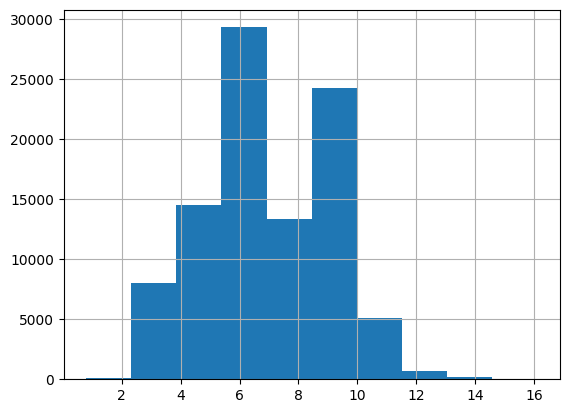

In [205]:
df_clean['Amount_log'].hist()

In [206]:
df_clean.to_parquet('../../data/interim/clean_data.parquet',)